In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Задание 1

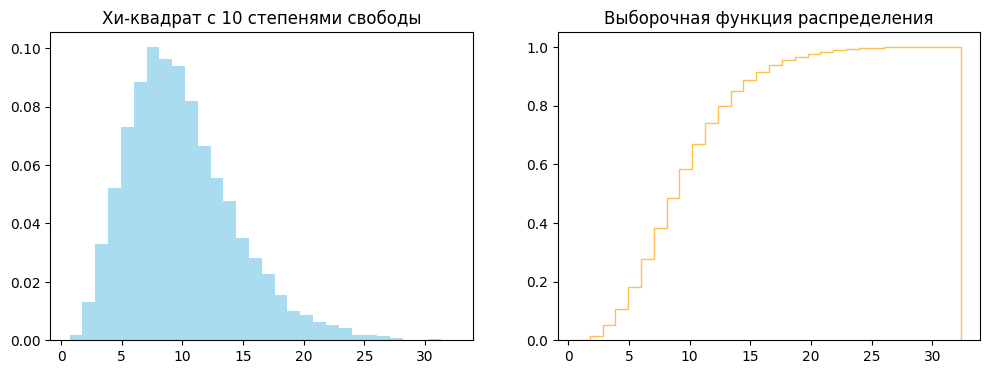

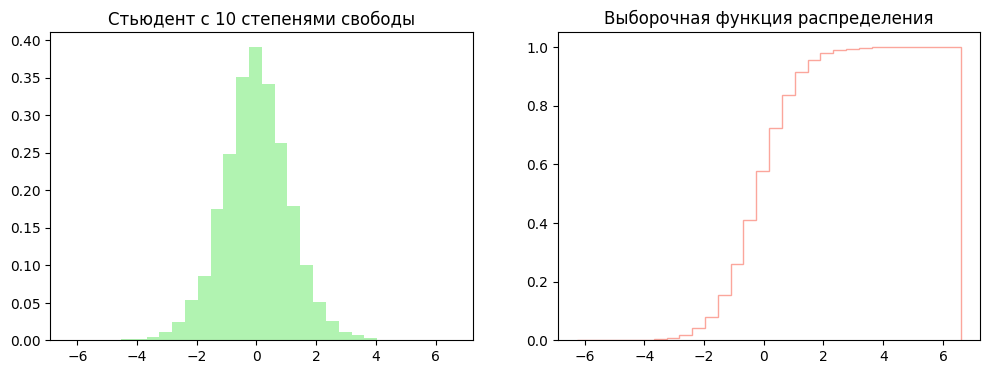

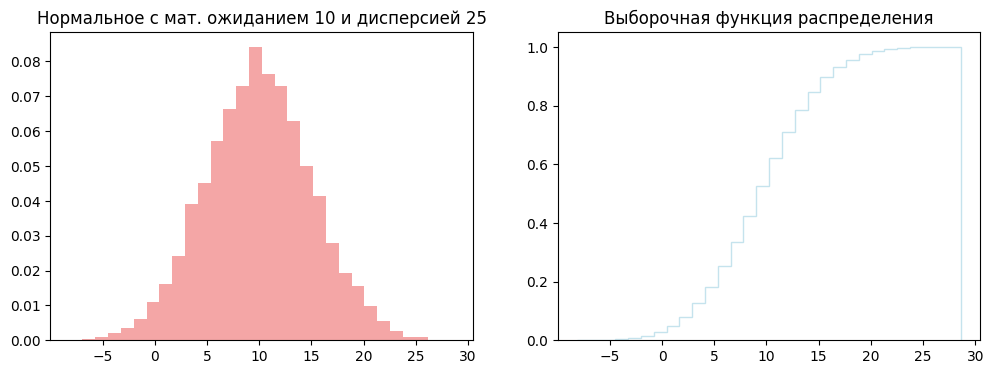

In [2]:
# Хи-квадрат с 10 степенями свободы
data_chi2 = np.random.chisquare(df=10, size=10000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_chi2, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Хи-квадрат с 10 степенями свободы')

plt.subplot(1, 2, 2)
plt.hist(data_chi2, bins=30, density=True, cumulative=True, color='orange', alpha=0.7, histtype='step')
plt.title('Выборочная функция распределения')

plt.show()

# Стьюдента с 10 степенями свободы
data_t = np.random.standard_t(df=10, size=10000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_t, bins=30, density=True, color='lightgreen', alpha=0.7)
plt.title('Стьюдент с 10 степенями свободы')

plt.subplot(1, 2, 2)
plt.hist(data_t, bins=30, density=True, cumulative=True, color='salmon', alpha=0.7, histtype='step')
plt.title('Выборочная функция распределения')

plt.show()

# Нормальное с мат. ожиданием 10 и дисперсией 25
data_norm = np.random.normal(loc=10, scale=5, size=10000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_norm, bins=30, density=True, color='lightcoral', alpha=0.7)
plt.title('Нормальное с мат. ожиданием 10 и дисперсией 25')

plt.subplot(1, 2, 2)
plt.hist(data_norm, bins=30, density=True, cumulative=True, color='lightblue', alpha=0.7, histtype='step')
plt.title('Выборочная функция распределения')

plt.show()

Задание 2

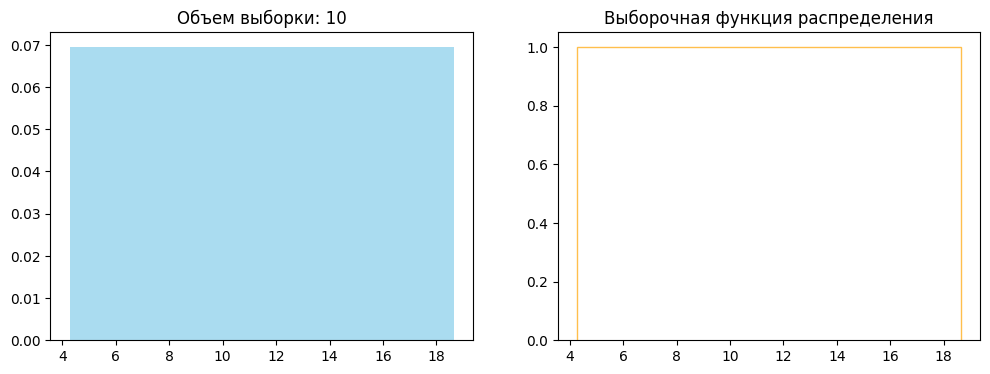

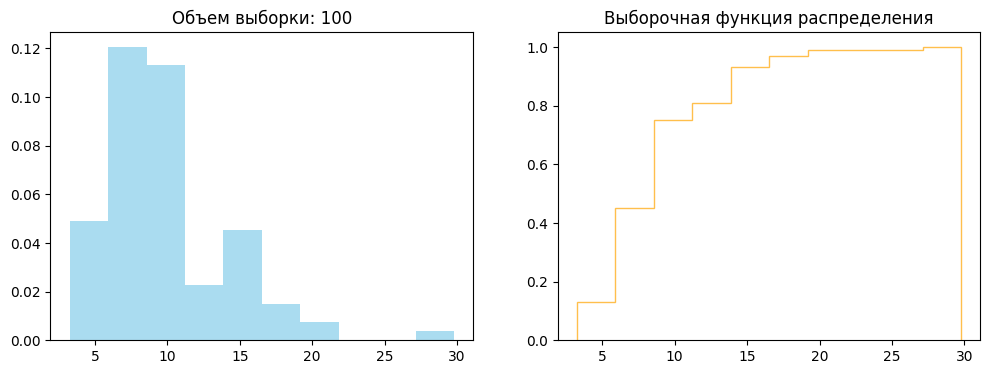

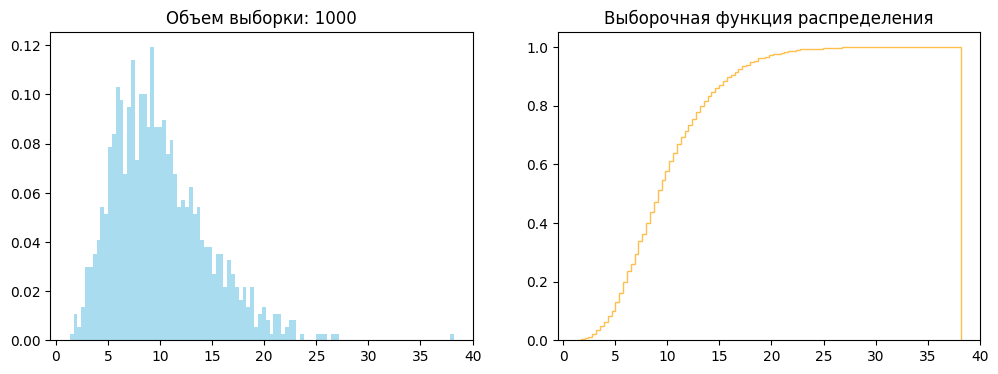

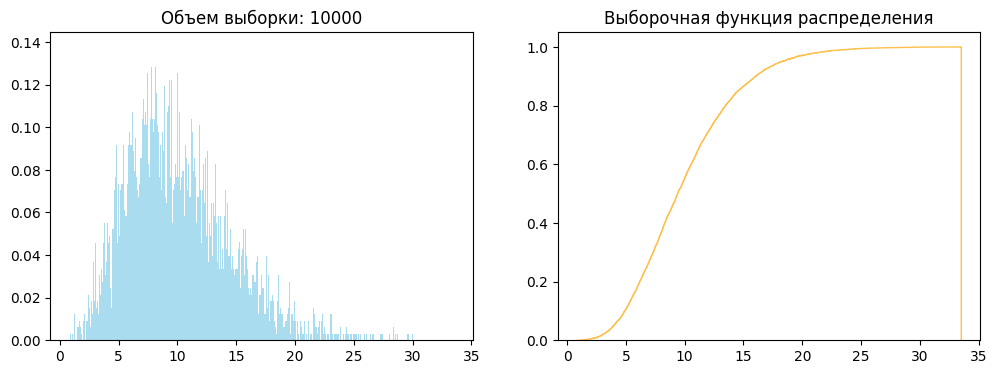

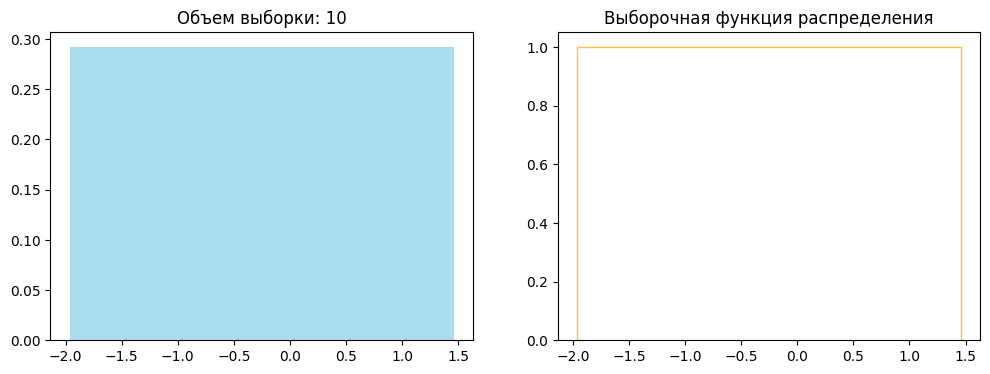

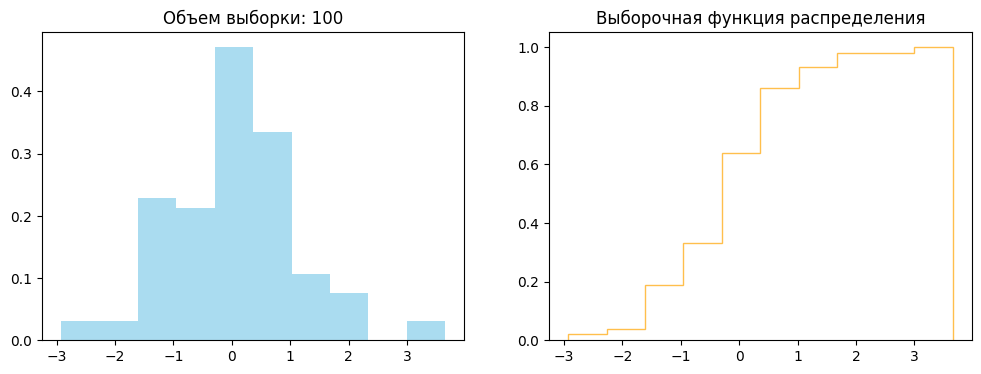

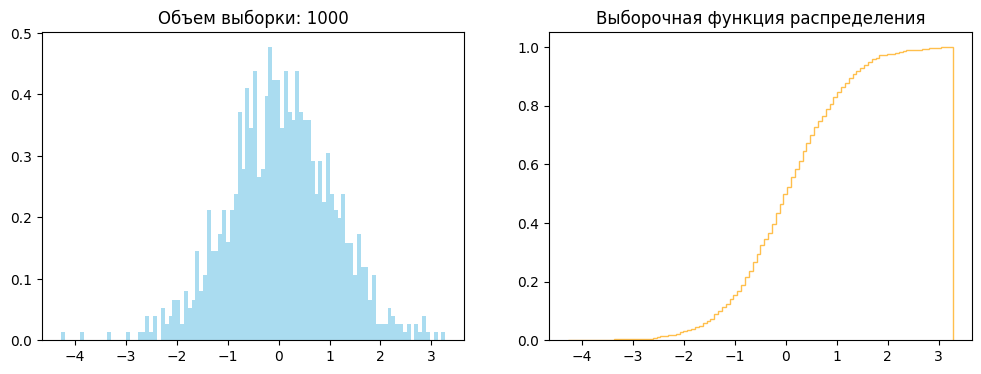

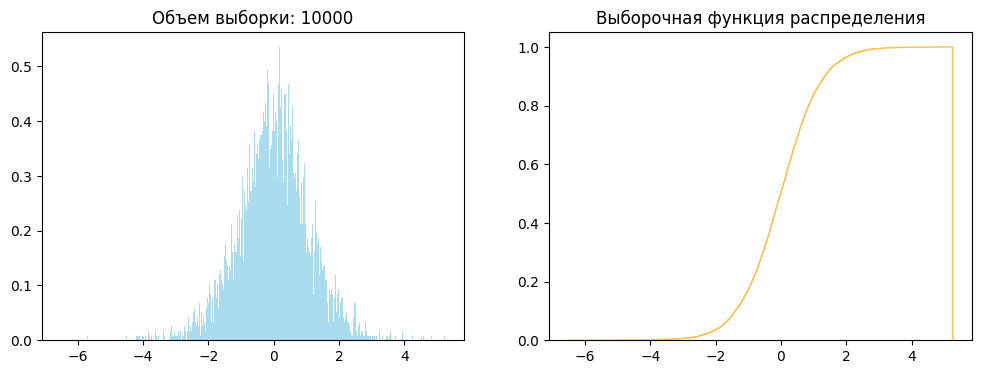

TypeError: plot_distribution() takes 3 positional arguments but 4 were given

In [3]:
# Определим функцию для отрисовки гистограммы и выборочной функции распределения для разного объема выборки
def plot_distribution(dist, df, sample_sizes):
    for size in sample_sizes:
        data = dist(df=df, size=size)
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.hist(data, bins=size//10, density=True, color='skyblue', alpha=0.7)
        plt.title(f'Объем выборки: {size}')
        
        plt.subplot(1, 2, 2)
        plt.hist(data, bins=size//10, density=True, cumulative=True, color='orange', alpha=0.7, histtype='step')
        plt.title('Выборочная функция распределения')
        
        plt.show()

# Хи-квадрат с 10 степенями свободы
sample_sizes = [10, 100, 1000, 10000]
plot_distribution(np.random.chisquare, 10, sample_sizes)

# Стьюдента с 10 степенями свободы
plot_distribution(np.random.standard_t, 10, sample_sizes)

# Нормальное с мат. ожиданием 10 и дисперсией 25
plot_distribution(np.random.normal, 10, 5, sample_sizes)

Задание 3

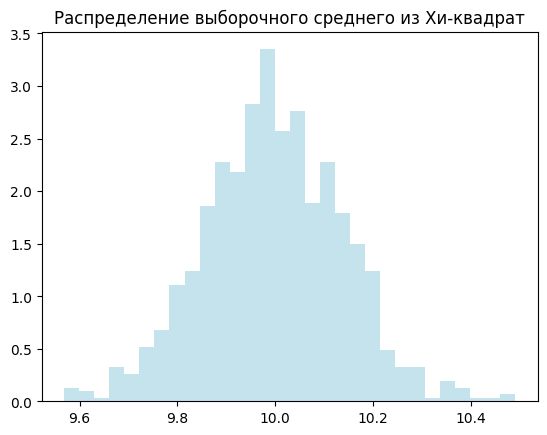

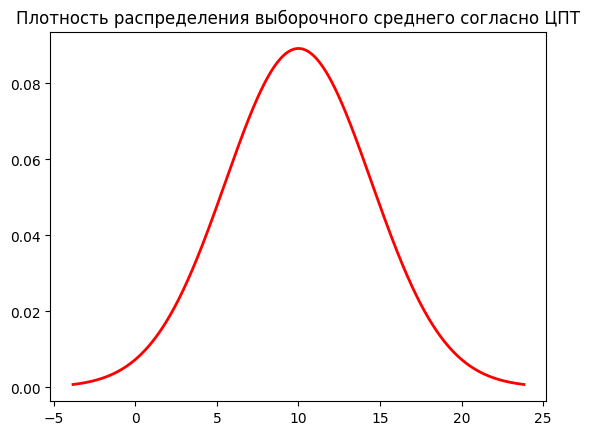

In [4]:
# Создание выборок и расчет выборочных средних
df = 10
sample_size = 1000
num_samples = 1000

samples = np.random.chisquare(df, size=(num_samples, sample_size))
sample_means = np.mean(samples, axis=1)

# Визуализация распределения выборочных средних
plt.hist(sample_means, bins=30, density=True, color='lightblue', alpha=0.7)
plt.title('Распределение выборочного среднего из Хи-квадрат')
plt.show()

# По ЦПТ для распределения Хи-квадрат с df степенями свободы мат. ожидание равно df, а дисперсия равна 2 * df
mean_chi2 = df
std_dev_chi2 = np.sqrt(2 * df)

# Нормальное распределение с параметрами выборочного среднего
norm_dist = stats.norm(loc=mean_chi2, scale=std_dev_chi2)
x = np.linspace(norm_dist.ppf(0.001), norm_dist.ppf(0.999), 1000)
y = norm_dist.pdf(x)

plt.plot(x, y, 'r-', lw=2)
plt.title('Плотность распределения выборочного среднего согласно ЦПТ')
plt.show()

Задание 4

In [5]:
def chi_square_cdf(x, df):
    return 1 - np.exp(-x/2)

n = 5  # число степеней свободы
N = 1000  # количество выборок
sample_values = np.random.chisquare(df=n, size=(N,))

# Вычисление значений выборочной функции распределения в точке 5
sample_cdf_values = chi_square_cdf(sample_values, n)

# Оценка математического ожидания и дисперсии выборочной функции распределения в точке 5
mean_estimate = np.mean(sample_cdf_values)
variance_estimate = np.var(sample_cdf_values)

# Теоретические значения матожидания и дисперсии
mean_theoretical = n
variance_theoretical = 2 * n

print("Полученная оценка матожидания выборочной ФР в точке 5:", mean_estimate)
print("Полученная оценка дисперсии выборочной ФР в точке 5:", variance_estimate)
print("Теоретическое матожидание в точке 5 для Хи-2 распределения с", n, "степенями свободы:", mean_theoretical)
print("Теоретическая дисперсия в точке 5 для Хи-2 распределения с", n, "степенями свободы:", variance_theoretical)

Полученная оценка матожидания выборочной ФР в точке 5: 0.8208411273854941
Полученная оценка дисперсии выборочной ФР в точке 5: 0.03339964678392086
Теоретическое матожидание в точке 5 для Хи-2 распределения с 5 степенями свободы: 5
Теоретическая дисперсия в точке 5 для Хи-2 распределения с 5 степенями свободы: 10
